In [33]:
# load enrgenics-quantlet-import
source("enrgenics-quantlet-import.r")


In [34]:
file = "data/sales_revenue_1.csv"
df = load_eia_data(file)

head(df)

Year Month State DataStatus      Date         Cat Revenue   Sales
1.RESIDENTIAL 1990     1    AK      Final 631195200 RESIDENTIAL   17477  181752
2.RESIDENTIAL 1990     1    AL      Final 631195200 RESIDENTIAL  123332 2070093
3.RESIDENTIAL 1990     1    AR      Final 631195200 RESIDENTIAL   72506 1026320
4.RESIDENTIAL 1990     1    AZ      Final 631195200 RESIDENTIAL  109332 1396499
5.RESIDENTIAL 1990     1    CA      Final 631195200 RESIDENTIAL  597161 6168009
6.RESIDENTIAL 1990     1    CO      Final 631195200 RESIDENTIAL   71325 1046805
              Customers Price ID
1.RESIDENTIAL         0  9.62  1
2.RESIDENTIAL         0  5.96  2
3.RESIDENTIAL         0  7.06  3
4.RESIDENTIAL         0  7.83  4
5.RESIDENTIAL         0  9.68  5
6.RESIDENTIAL         0  6.81  6

In [59]:
totals = subset(df, DataStatus=="Final")
# tmp = dcast(totals[which(totals$Cat == "TOTAL"),], Year + Month ~ State + Cat, value.var="Sales", fun.aggregate = sum, na.rm = TRUE)
ts_year_by_state = dcast(totals[which(totals$Cat == "TOTAL"),], Year ~ State, value.var="Sales", fun.aggregate = sum)
corr_states = cor(ts_year_by_state[, c(-1,-ncol(ts_year_by_state))])
means_by_state = colMeans(ts_year_by_state[,-1])

[1] 2712554662 2762003050 2763365474 2861462336 2934562867 3013286575
 [7] 3101127032 3145610430 3264230749 3312087083 3421414256 3394458107
[13] 3465466011 3493734498 3547479479 3660968521 3669918842 3764560731
[19] 3733964624 3596795150 3754841377 3749846184 3694649791 3724867839
[25] 3764700296

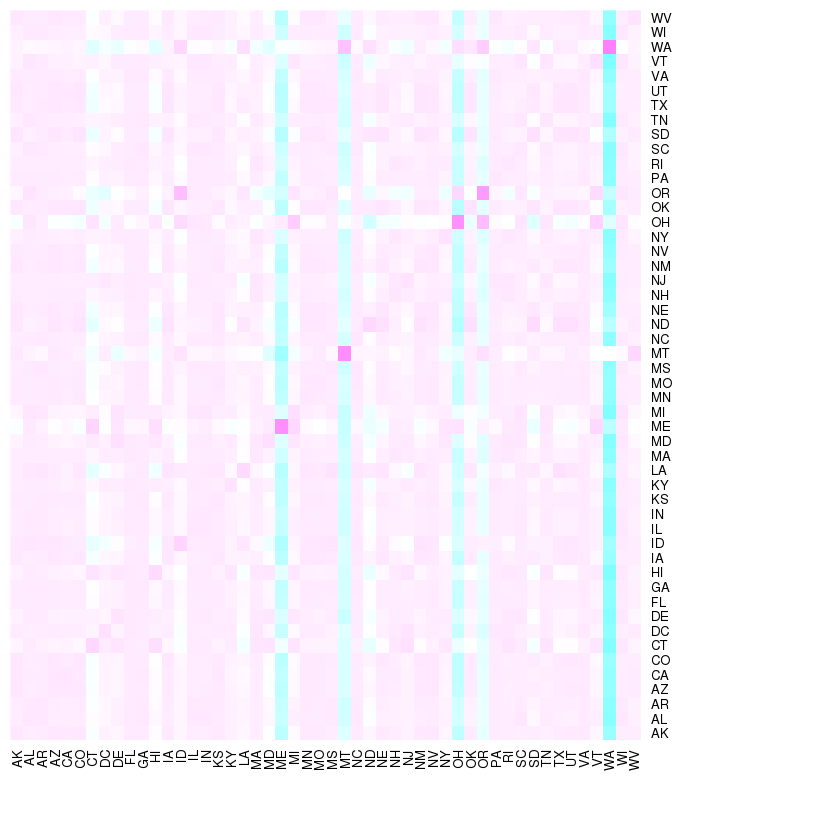

In [20]:
heatmap(corr_states, Rowv=NA, Colv=NA, col = cm.colors(256), margins=c(5,10))

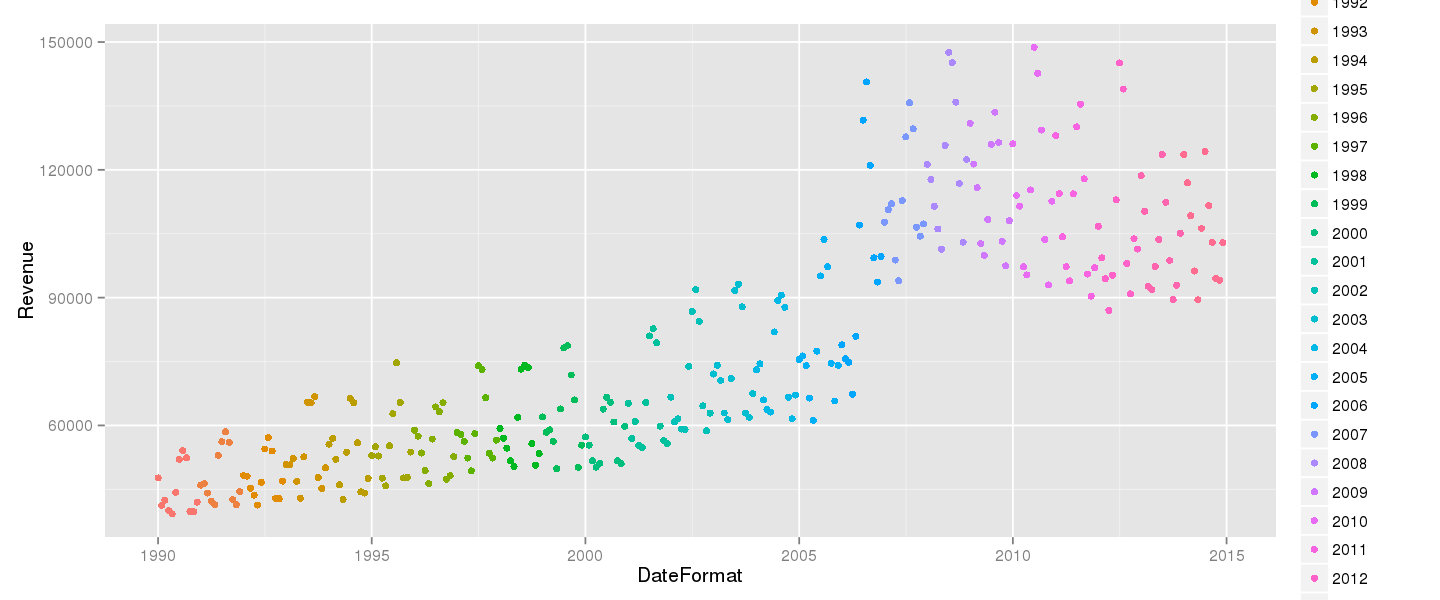

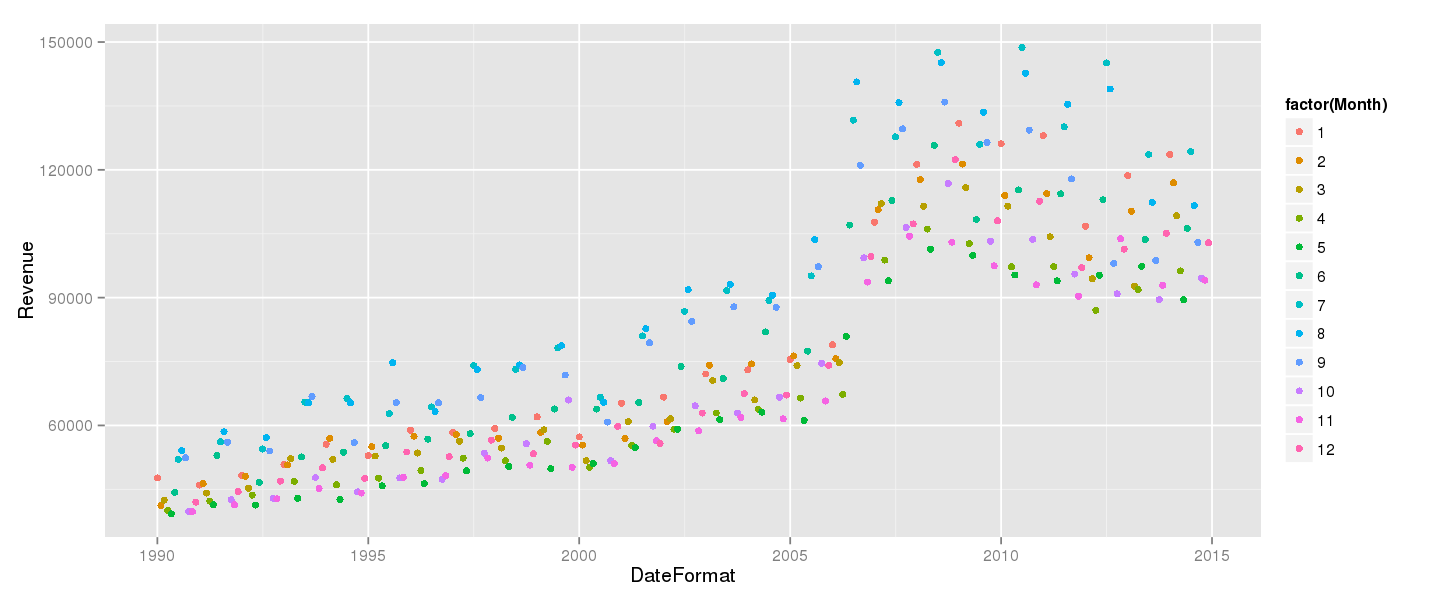

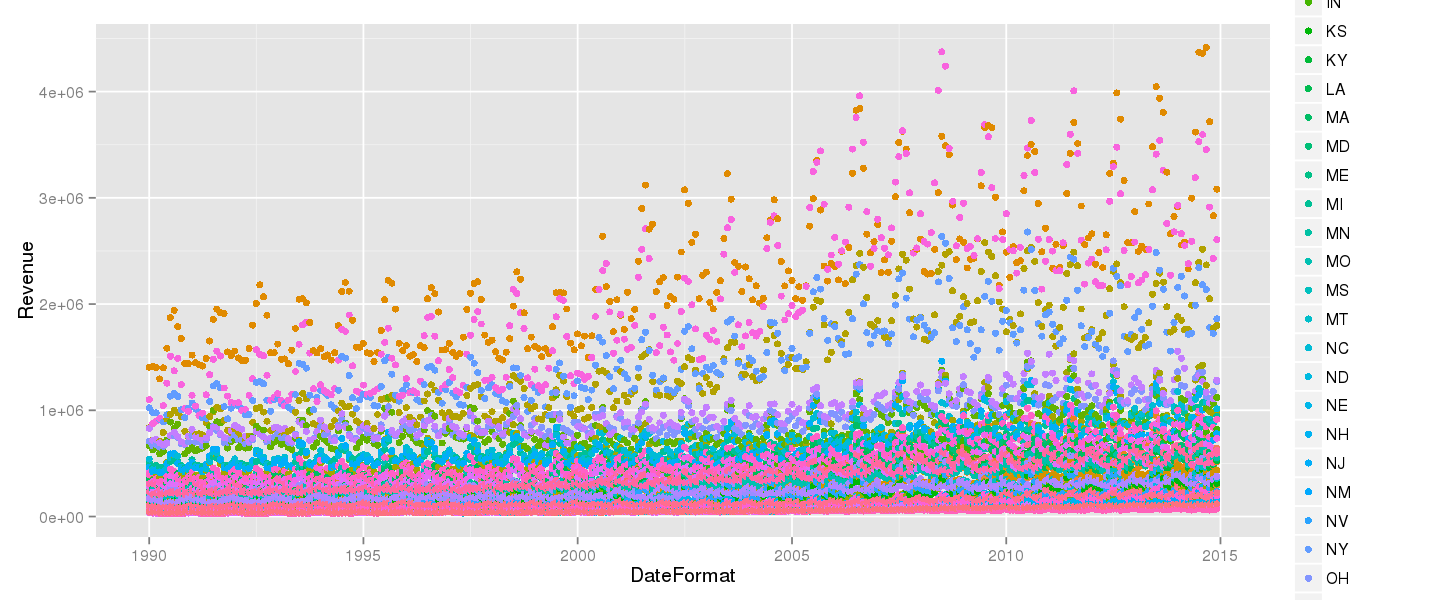

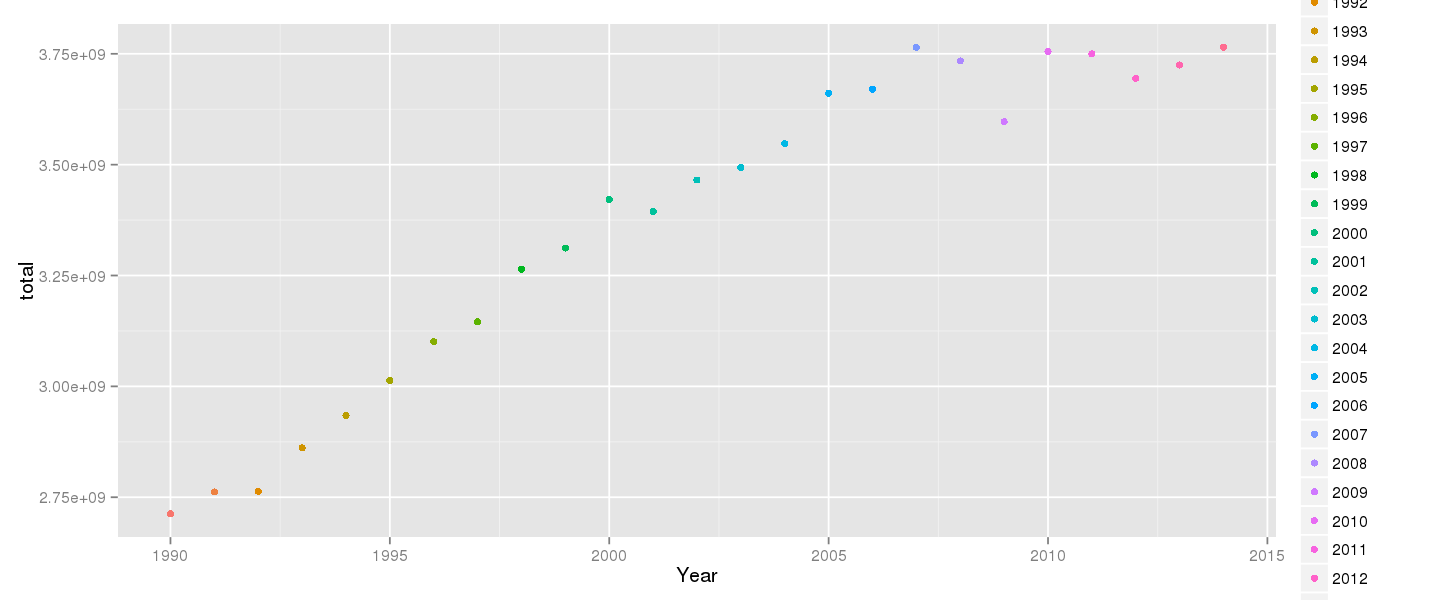

In [67]:
#http://www.r-bloggers.com/ggplot2-cheatsheet-for-scatterplots/
library(ggplot2)
# plot options for Jupyter Notebook
options(repr.plot.width = 12, repr.plot.height = 5)

# Plot Set 1
totals = subset(df, DataStatus=="Final" & Cat == "TOTAL")
totals$DateFormat = as.Date(as.POSIXct(totals$Date, origin="1970-01-01"))
totals_sub = subset(totals, State=="DE")
totals_sub$DateFormat = as.Date(as.POSIXct(totals_sub$Date, origin="1970-01-01"))
p1 = ggplot(totals_sub, aes(x = DateFormat, y = Revenue))
p1 + geom_point(aes(color=factor(Year)))
ggsave("output/plt1a.png", width = 16, height = 9, dpi = 120)
p1 + geom_point(aes(color=factor(Month)))
ggsave("output/plt1b.png", width = 16, height = 9, dpi = 120)
p1c = ggplot(totals, aes(x = DateFormat, y = Revenue))
p1c + geom_point(aes(color=factor(State)))
ggsave("output/plt1c.png", width = 30, height = 20, dpi = 120)


# Plot Set 2
forp2 = ts_year_by_state
forp2$total = apply(ts_year_by_state[,2:ncol(ts_year_by_state)], 1,function(x){sum(x)})
p2 = ggplot(forp2, aes(x = Year, y = total))
p2 + geom_point(aes(color=factor(Year)))

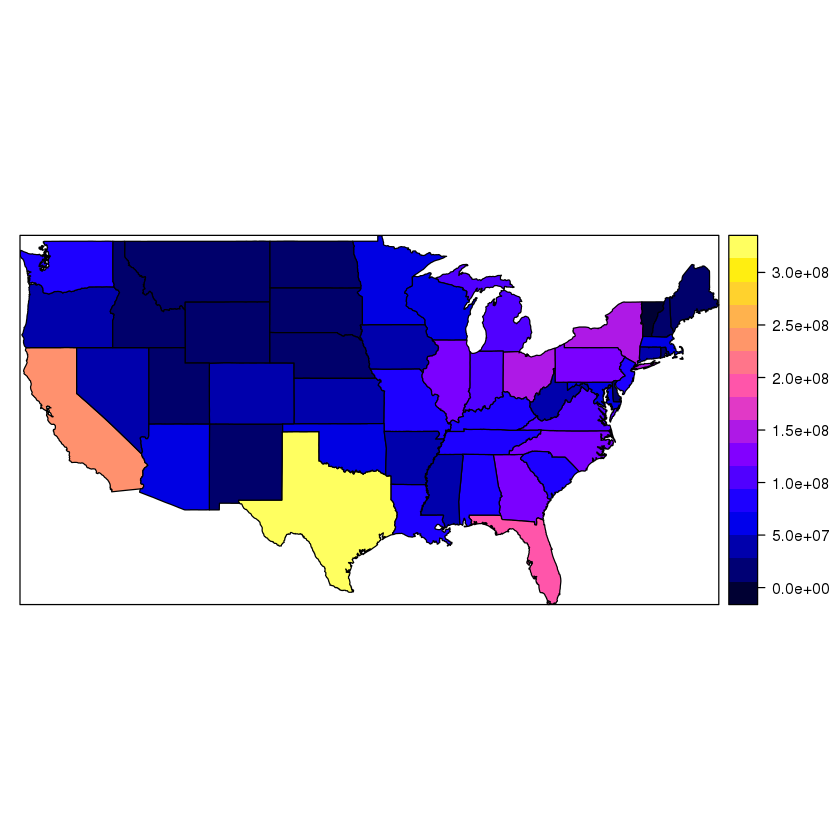

In [16]:
# consider weather data
# https://ram-n.github.io/weatherData/

# mapping without advanced libs
# http://stackoverflow.com/questions/24441775/how-do-you-create-a-us-states-heatmap-based-on-some-values

library(MASS)
library(maps)
library(maptools)
library(sp)

permit = gpclibPermit()
means_df = data.frame(means_by_state)
dat = means_df
dat$states <- tolower(state.name[match(rownames(dat),  state.abb)])
mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x){x[1]})
USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))

idx <- match(unique(nms),  dat$states)
dat2 <- data.frame(value = dat$means_by_state[idx], state = unique(nms))
row.names(dat2) <- unique(nms)
USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)
    
spplot(USAsp['value'])
# https://www.census.gov/popest/data/datasets.html
# https://docs.google.com/spreadsheets/d/1JsV5bNnFoE-4xapsnrpqRP-5wgTkpDjgC0SXKW8zgPI/edit#gid=0